In [1]:
# For this project, we are using networkx 1.9.1 since GML is failed to parse in the new version.
# For our project, we choose the network of games of the American College Football
# during the Fall 2000.
from networkx import *
import matplotlib.pyplot as plt
from collections import defaultdict

import numpy as np
import pandas as pd
import community
import networkx as nx
url="http://www-personal.umich.edu/~mejn/netdata/football.zip"

import urllib
import io
import zipfile

football = urllib.urlopen(url)  # open URL
f=io.BytesIO(football.read()) # read into BytesIO "file"
football.close()

zf = zipfile.ZipFile(f) # zipfile object
txt=zf.read('football.txt').decode() # read info file
gml=zf.read('football.gml').decode() # read gml data
# throw away bogus first line with # from mejn files
gml=gml.split('\n')[1:]
G=parse_gml(gml) # parse gml data
g=nx.Graph(G)


/Users/vivian/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/vivian/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/vivian/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/vivian/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

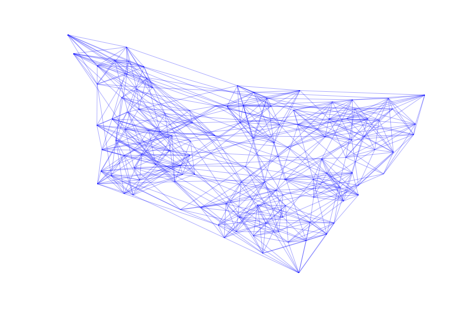

In [2]:
nx.draw_spring(g,node_size=0,edge_color='b', lable=True, alpha=.2, font_size=10)
plt.show()

# After we are graph this dataset, it becomes a huge"mess". 

In [37]:
# The nodes are teams and the edges are the games between the teams. 
# As we are doing ‘nx.info()’, we found that there were 115 teams, 613 games in total
# and the average number of game is 10.7.
# Each node was assigned the ID which is from 0 to 114, and a conference ID which is from 0 to 11.
# The Conference ID is based on which conference the colleges belonged to.
print nx.info(g)
G.is_directed()
# This network is also not a directed network, which means from the network, we may not be able 
# to figure who wined or lost. 

Name: ()
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


False

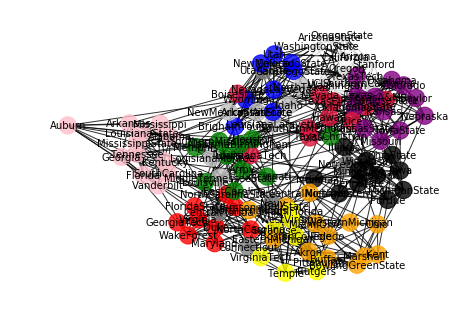

In [66]:
#So, We decide to give each conference group a color and try to graph again.
##0 = Atlantic Coast
##1 = Big East
##2 = Big Ten
##3 = BigTwelve
##4 = Conference USA
##5 = Independents
##6 = Mid-American
##7 = MountainWest
##8 = PacificTen
##9 = Southeastern
##10 = SunBelt
##11 = WesternAthletic.


ACC=[]
BigEast=[]
Big10=[]
Big12=[]
ConferenceUSA=[]
Independants=[]
MidAmerican=[]
MountainWest=[]
PacTen=[]
SEC=[]
SunBelt=[]
WesternAthletic= []

node_color = []

for i,j in g.nodes_iter(data = True):
    if j['value'] == 0:
        ACC.append(i)
        node_color.append('red')
    elif j['value'] == 1:
        BigEast.append(i)
        node_color.append('yellow')
    elif j['value']== 2:
        Big10.append(i)
        node_color.append('black')
    elif j['value']== 3:
        Big12.append(i)
        node_color.append('purple')
    elif j['value']== 4:
        ConferenceUSA.append(i)
        node_color.append('green')
    elif j['value']== 5:
        Independants.append(i)
        node_color.append('grey')
    elif j['value']== 6:
        MidAmerican.append(i)
        node_color.append('orange')
    elif j['value']== 7:
        MountainWest.append(i)
        node_color.append('blue')
    elif j['value']== 8:
        PacTen.append(i)
        node_color.append('white')
    elif j['value']== 9:
        SEC.append(i)
        node_color.append('pink')
    elif j['value']== 10:
        SunBelt.append(i)
        node_color.append('silver')
    else:
        WesternAthletic.append(i)
        node_color.append('crimson')
nx.draw_spring(g,node_size=300,edge_color='black', with_labels = True, alpha=.8, font_size=10, node_color = node_color )
plt.show()


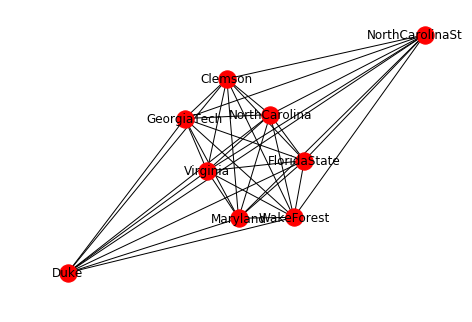

9

In [6]:
# OK! Now, it becomes a little bit better. Now we are gonna break teams into their own conference group.

# For Atlantic Coast Conference
g_ACC= g.subgraph(ACC)

nx.draw(g_ACC, with_labels=True)
plt.show()
len(g_ACC) # There are 9 teams in this conference group.

In [9]:
deg=nx.degree(g_ACC)
# This function returns a sorted degree list- can help us to spot the Teams which played the mose of games
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda(k,v): (-v,k))
    return ms
ds = sorted_map(deg)
ds # From the result, we can see that all the teams in ACC compete with each other.
# However, for big conference groups, they may not be able to compete with each other such as 
#Big Ten, they have 11 teams but they only play 8 games.

[(u'Clemson', 8),
 (u'Duke', 8),
 (u'FloridaState', 8),
 (u'GeorgiaTech', 8),
 (u'Maryland', 8),
 (u'NorthCarolina', 8),
 (u'NorthCarolinaState', 8),
 (u'Virginia', 8),
 (u'WakeForest', 8)]

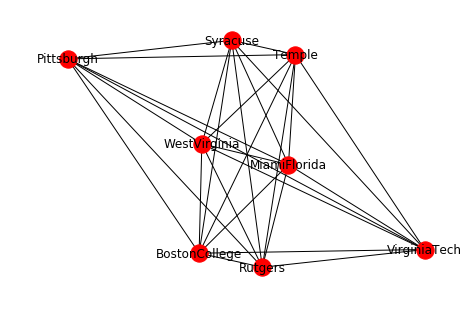

8

In [11]:
# For Big East conference group.
g_BigEast= g.subgraph(BigEast)

nx.draw(g_BigEast, with_labels=True)
plt.show()
len(g_BigEast) # There are 8 teams in this conference group.

In [39]:
deg=nx.degree(g_BigEast)
ds=sorted_map(deg)
ds

[(u'BostonCollege', 7),
 (u'MiamiFlorida', 7),
 (u'Pittsburgh', 7),
 (u'Rutgers', 7),
 (u'Syracuse', 7),
 (u'Temple', 7),
 (u'VirginiaTech', 7),
 (u'WestVirginia', 7)]

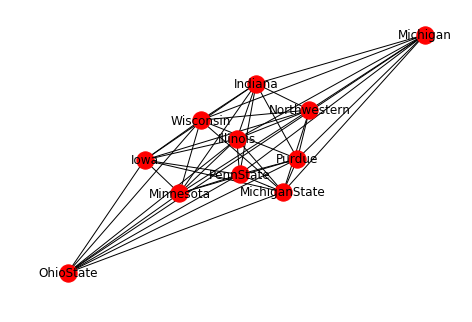

11

In [18]:
# For Big Ten

g_Big10= g.subgraph(Big10)

nx.draw(g_Big10, with_labels=True)
plt.show()
len(g_Big10) # There are 11 teams in this conference group.

In [40]:
deg=nx.degree(g_Big10)
ds = sorted_map(deg)
ds

[(u'Illinois', 8),
 (u'Indiana', 8),
 (u'Iowa', 8),
 (u'Michigan', 8),
 (u'MichiganState', 8),
 (u'Minnesota', 8),
 (u'Northwestern', 8),
 (u'OhioState', 8),
 (u'PennState', 8),
 (u'Purdue', 8),
 (u'Wisconsin', 8)]

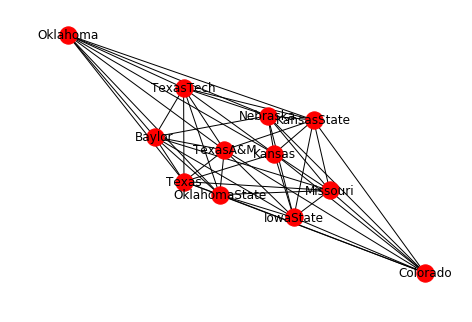

12

In [41]:
g_Big12= g.subgraph(Big12)

nx.draw(g_Big12, with_labels=True)
plt.show()
len(g_Big12) # There are 12 teams in this conference group.

In [43]:
deg=nx.degree(g_Big12)
ds = sorted_map(deg)
ds

[(u'Baylor', 8),
 (u'Colorado', 8),
 (u'IowaState', 8),
 (u'Kansas', 8),
 (u'KansasState', 8),
 (u'Missouri', 8),
 (u'Nebraska', 8),
 (u'Oklahoma', 8),
 (u'OklahomaState', 8),
 (u'Texas', 8),
 (u'TexasA&M', 8),
 (u'TexasTech', 8)]

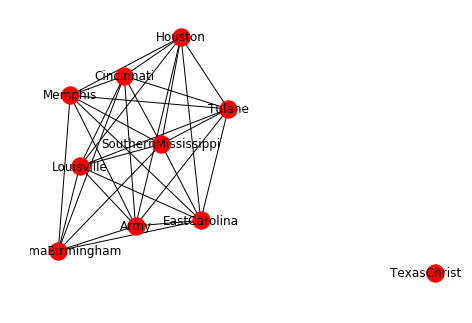

10

In [44]:
g_ConferenceUSA= g.subgraph(ConferenceUSA)

nx.draw(g_ConferenceUSA, with_labels=True)
plt.show()
len(g_ConferenceUSA) # There are 10 teams in this conference group.

In [46]:
deg=nx.degree(g_ConferenceUSA)
ds = sorted_map(deg)
ds 

[(u'Army', 7),
 (u'Cincinnati', 7),
 (u'EastCarolina', 7),
 (u'Houston', 7),
 (u'Louisville', 7),
 (u'Memphis', 7),
 (u'SouthernMississippi', 7),
 (u'Tulane', 7),
 (u'AlabamaBirmingham', 6),
 (u'TexasChristian', 0)]

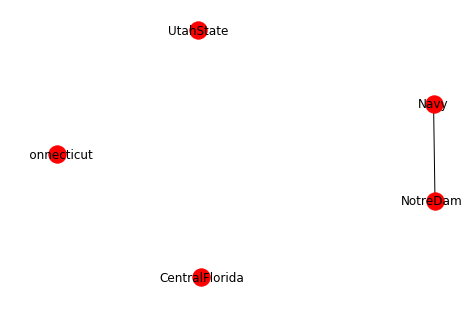

5

In [47]:
g_Independants= g.subgraph(Independants)

nx.draw(g_Independants, with_labels=True)
plt.show()
len(g_Independants) # There are 5 teams in this conference group.


In [50]:
deg=nx.degree(g_Independants)
ds = sorted_map(deg)
ds 

[(u'Navy', 1),
 (u'NotreDame', 1),
 (u'CentralFlorida', 0),
 (u'Connecticut', 0),
 (u'UtahState', 0)]

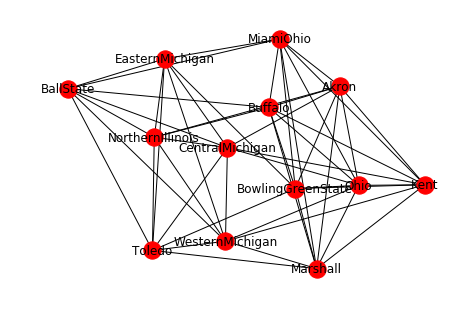

13

In [52]:
g_MidAmerican= g.subgraph(MidAmerican)

nx.draw(g_MidAmerican, with_labels=True)
plt.show()
len(g_MidAmerican) # There are 13 teams in this conference group.

In [53]:
deg=nx.degree(g_MidAmerican)
ds = sorted_map(deg)
ds 

[(u'Akron', 8),
 (u'BowlingGreenState', 8),
 (u'Buffalo', 8),
 (u'CentralMichigan', 8),
 (u'Kent', 8),
 (u'Marshall', 8),
 (u'MiamiOhio', 8),
 (u'Ohio', 8),
 (u'WesternMichigan', 8),
 (u'BallState', 7),
 (u'EasternMichigan', 7),
 (u'NorthernIllinois', 7),
 (u'Toledo', 7)]

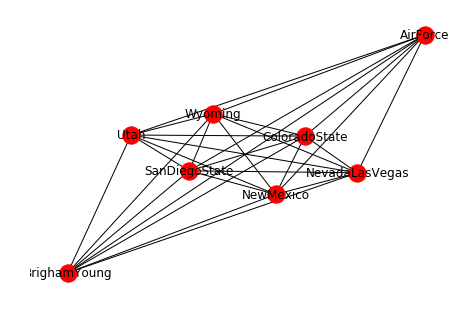

8

In [54]:
g_MountainWest= g.subgraph(MountainWest)

nx.draw(g_MountainWest, with_labels=True)
plt.show()
len(g_MountainWest) # There are 8 teams in this conference group.

In [55]:
deg=nx.degree(g_MountainWest)
ds = sorted_map(deg)
ds 

[(u'AirForce', 7),
 (u'BrighamYoung', 7),
 (u'ColoradoState', 7),
 (u'NevadaLasVegas', 7),
 (u'NewMexico', 7),
 (u'SanDiegoState', 7),
 (u'Utah', 7),
 (u'Wyoming', 7)]

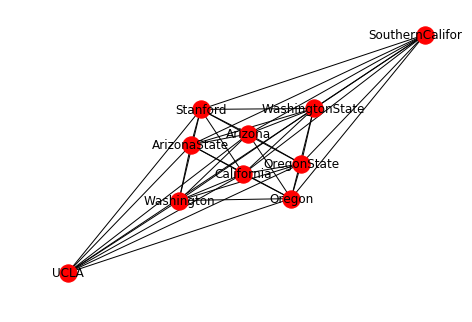

10

In [56]:
g_PacTen= g.subgraph(PacTen)

nx.draw(g_PacTen, with_labels=True)
plt.show()
len(g_PacTen) # There are 10 teams in this conference group.


In [57]:
deg=nx.degree(g_PacTen)
ds = sorted_map(deg)
ds 

[(u'Arizona', 8),
 (u'ArizonaState', 8),
 (u'California', 8),
 (u'Oregon', 8),
 (u'OregonState', 8),
 (u'SouthernCalifornia', 8),
 (u'Stanford', 8),
 (u'UCLA', 8),
 (u'Washington', 8),
 (u'WashingtonState', 8)]

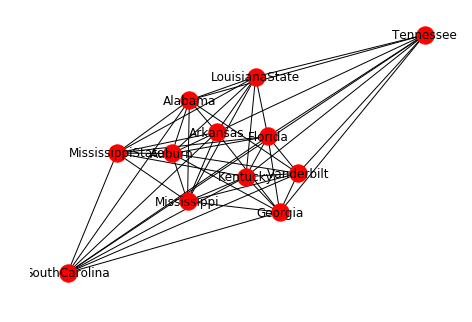

12

In [59]:
g_SEC= g.subgraph(SEC)

nx.draw(g_SEC, with_labels=True)
plt.show()
len(g_SEC) # There are 12 teams in this conference group.

In [61]:
deg=nx.degree(g_SEC)
ds = sorted_map(deg)
ds 

[(u'Alabama', 8),
 (u'Arkansas', 8),
 (u'Auburn', 8),
 (u'Florida', 8),
 (u'Georgia', 8),
 (u'Kentucky', 8),
 (u'LouisianaState', 8),
 (u'Mississippi', 8),
 (u'MississippiState', 8),
 (u'SouthCarolina', 8),
 (u'Tennessee', 8),
 (u'Vanderbilt', 8)]

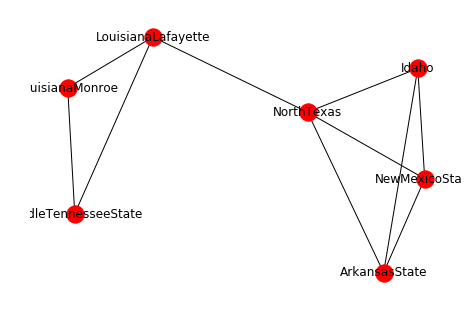

7

In [63]:
g_SunBelt= g.subgraph(SunBelt)

nx.draw(g_SunBelt, with_labels=True)
plt.show()
len(g_SunBelt) # There are 7 teams in this conference group.

In [64]:
deg=nx.degree(g_SunBelt)
ds = sorted_map(deg)
ds 

[(u'NorthTexas', 4),
 (u'ArkansasState', 3),
 (u'Idaho', 3),
 (u'LouisianaLafayette', 3),
 (u'NewMexicoState', 3),
 (u'LouisianaMonroe', 2),
 (u'MiddleTennesseeState', 2)]

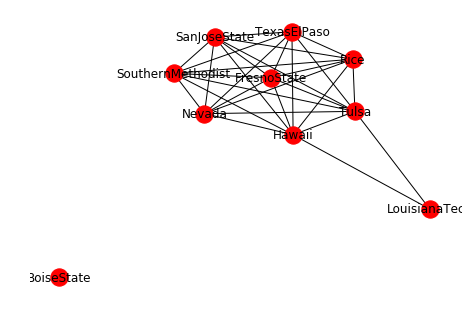

10

In [67]:
g_WesternAthletic= g.subgraph(WesternAthletic)

nx.draw(g_WesternAthletic, with_labels=True)
plt.show()
len(g_WesternAthletic) # There are 10 teams in this conference group.

In [68]:
deg=nx.degree(g_WesternAthletic)
ds = sorted_map(deg)
ds 

[(u'Hawaii', 8),
 (u'Tulsa', 8),
 (u'FresnoState', 7),
 (u'Nevada', 7),
 (u'Rice', 7),
 (u'SanJoseState', 7),
 (u'SouthernMethodist', 7),
 (u'TexasElPaso', 7),
 (u'LouisianaTech', 2),
 (u'BoiseState', 0)]

In [20]:
#Since NCAA imposes rules restricting the number of games each team can play, either 11 or 12, the teams in this network
#all have similar degree. As the graphs, we can have the same result. 
def trim_nodes(G,d):
    Gt=G.copy()
    dn=nx.degree(Gt)
    for n in Gt.nodes():
        if dn[n]<=d:
            Gt.remove_node(n)
    return Gt

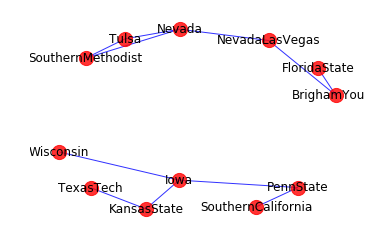

12

In [21]:
# There are 12 teams play 12 games
Gt = trim_nodes(g,11)
plt.axis('off')

nx.draw(Gt, node_size=200, node_color='r', edge_color='b', alpha=0.8,with_labels = True)
plt.show()
len(Gt)

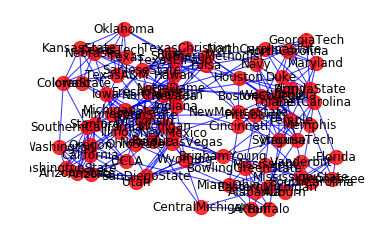

78

In [22]:
# There are 66 teams play 11 games.
Gt = trim_nodes(g,10)
plt.axis('off')

nx.draw(Gt, node_size=200, node_color='r', edge_color='b', alpha=0.8,with_labels = True)
plt.show()
len(Gt)

In [24]:
deg=nx.degree(G)
min(deg.values())

7

In [25]:
max(deg.values())

12

In [26]:
# Top 15 teams in the list
ds = sorted_map(deg)
ds[:10]

[(u'BrighamYoung', 12),
 (u'FloridaState', 12),
 (u'Iowa', 12),
 (u'KansasState', 12),
 (u'Nevada', 12),
 (u'NevadaLasVegas', 12),
 (u'PennState', 12),
 (u'SouthernCalifornia', 12),
 (u'SouthernMethodist', 12),
 (u'TexasTech', 12)]

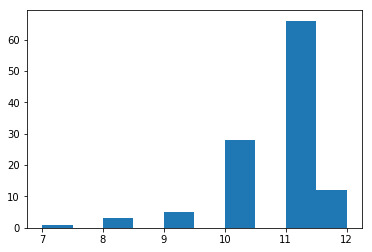

In [27]:
h = plt.hist(deg.values())
plt.show(h)

# This histogram is highly skewd left.

In [92]:
nx.set_edge_attributes(G,'weight',1)
nx.set_node_attributes(G,'centrality',degree_centrality(G))
nG = nx.Graph()

In [93]:
#https://stackoverflow.com/questions/15590812/networkx-convert-multigraph-into-simple-graph-with-weighted-edges
#I recommend anyone reading this, to snag the below function for converting multigraphs into simple graphs

#To calculate Eigenvector centrality; it was necessary to combine multi-edges
#If say edge (0,1) existed twice; it was converted to one edge, with a weight of two. 
for u,v,data in G.edges_iter(data=True):
    w = data['weight'] 
    if nG.has_edge(u,v):
        nG[u][v]['weight'] += w
    else:
        nG.add_edge(u, v, weight=w)

In [94]:
nG.add_nodes_from(g.nodes(data=True))
nx.set_node_attributes(nG,'Eigen',eigenvector_centrality(nG))
nG.nodes(data=True)

[(u'Mississippi',
  {'Eigen': 0.08381873568954482,
   'id': 87,
   'label': u'Mississippi',
   'value': 9}),
 (u'OregonState',
  {'Eigen': 0.10099115080655273,
   'id': 108,
   'label': u'OregonState',
   'value': 8}),
 (u'NotreDame',
  {'Eigen': 0.10091547519644513, 'id': 82, 'label': u'NotreDame', 'value': 5}),
 (u'Wyoming',
  {'Eigen': 0.10379164577225117, 'id': 16, 'label': u'Wyoming', 'value': 7}),
 (u'Minnesota',
  {'Eigen': 0.10194480034835166, 'id': 60, 'label': u'Minnesota', 'value': 2}),
 (u'Illinois',
  {'Eigen': 0.10645062999035589, 'id': 64, 'label': u'Illinois', 'value': 2}),
 (u'Kent',
  {'Eigen': 0.076030757411446, 'id': 54, 'label': u'Kent', 'value': 6}),
 (u'Toledo',
  {'Eigen': 0.0681726904086196, 'id': 85, 'label': u'Toledo', 'value': 6}),
 (u'Indiana',
  {'Eigen': 0.10502764392065551, 'id': 106, 'label': u'Indiana', 'value': 2}),
 (u'TexasChristian',
  {'Eigen': 0.11494380773370597,
   'id': 110,
   'label': u'TexasChristian',
   'value': 4}),
 (u'Texas',
  {'Eigen

In [97]:
dc=nx.degree_centrality(G)
dcs=sorted_map(dc)
dcs[:10]
# we can see that the first 10 teams that play 12 games also have the highest rank of degree centrality.
# It also proves that the node has more neighbors to connect, its degree will be higher. 
# teams who play 12 games not only play within their own conference, they may also play with other teams outside their conferences
# That’s the reason why they can have higher degree centrality because they not only connect with teams in their own conferences
# but they also can connect with teams outside their conferences. 


[(u'BrighamYoung', 0.10526315789473684),
 (u'FloridaState', 0.10526315789473684),
 (u'Iowa', 0.10526315789473684),
 (u'KansasState', 0.10526315789473684),
 (u'Nevada', 0.10526315789473684),
 (u'NevadaLasVegas', 0.10526315789473684),
 (u'PennState', 0.10526315789473684),
 (u'SouthernCalifornia', 0.10526315789473684),
 (u'SouthernMethodist', 0.10526315789473684),
 (u'TexasTech', 0.10526315789473684)]

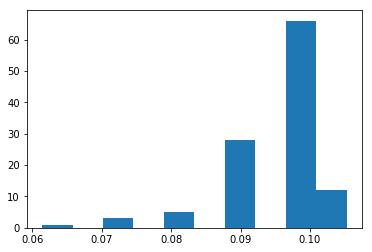

In [96]:
h = plt.hist(dc.values())
plt.show(h)

In [98]:
ec=nx.eigenvector_centrality(G)
ecs=sorted_map(ec)
ecs[:10]
# Unlike the degree centrality, the eigenvector centrality is that a node is important if it is linked to by other important nodes.
# It means that a node with high degree centrality does not meant that it also has high eigenvector centrality.
# For example, BrighamYoung has the highest degree centrality, 
# but it does not have the highest eigenvector centrality accordingly.
# In this case, it means that Brigham Young may have games with other teams that do not have high eigenvector centrality as well. 
# Conversely, Nevada had the highest eigenvector centrality
# because it connected with other high eigenvector centrality teams and it also played the most number of game as well. 
# Nevada may played a lot of teams that made it to bowl games.

[(u'Nevada', 0.12768424714143733),
 (u'SouthernMethodist', 0.12257733284057698),
 (u'Tulsa', 0.12128957246239933),
 (u'SouthernCalifornia', 0.1207252812631775),
 (u'SanJoseState', 0.1199035354268502),
 (u'FresnoState', 0.11956928362396665),
 (u'Hawaii', 0.1176960436025193),
 (u'Rice', 0.11724691716369856),
 (u'TexasElPaso', 0.11647241977171087),
 (u'Wisconsin', 0.11630296390411189)]

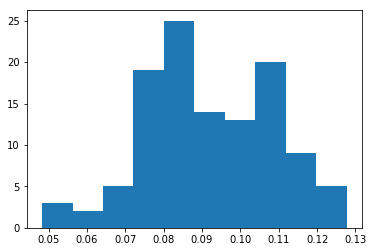

In [99]:
h = plt.hist(ec.values())
plt.show(h)

In [102]:
c=nx.closeness_centrality(G)
cs=sorted_map(c)
cs[:10]
# the more central the node is, the closer it is to all other nodes. 
# the higher closeness may show that the game may have more games with other teams in other conference group.
# For example, Louisiana Tech has the highest the closeness centrality. 
# we find out Louisiana Tech is in the conference of Western Athletic, and it only had 2 games with Hawaii and Tulsa in the Western Athletic. 
# each team had 7 games to 12 games so Louisiana Tech will have other 5 to 10 games with teams from other conference. 
# That’s the reason why Louisiana Tech has the highest closeness centrality.

[(u'LouisianaTech', 0.4367816091954023),
 (u'Navy', 0.4351145038167939),
 (u'Tulsa', 0.43018867924528303),
 (u'Indiana', 0.42696629213483145),
 (u'PennState', 0.4253731343283582),
 (u'ArkansasState', 0.42379182156133827),
 (u'BrighamYoung', 0.42379182156133827),
 (u'Cincinnati', 0.42379182156133827),
 (u'Wisconsin', 0.42379182156133827),
 (u'Wyoming', 0.42379182156133827)]

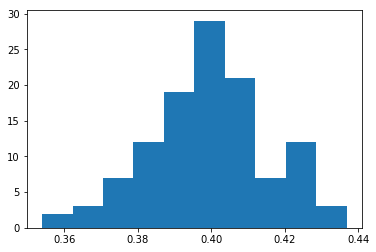

In [30]:
h = plt.hist(c.values())
plt.show(h)

In [31]:
b=nx.betweenness_centrality(G)
bs=sorted_map(b)
bs[:10]
#nodes with high betweenness may have considerable influence within a network.
# In the football game, it means that the team play most of games with it neighbor within the same conference. 
# So the team such as Louisiana Tech may not have high betweenness since it only played 2 games within its conference.


[(u'NotreDame', 0.03353295672662948),
 (u'BrighamYoung', 0.03248994918389482),
 (u'Navy', 0.02916105326422372),
 (u'LouisianaTech', 0.028822823420770936),
 (u'CentralMichigan', 0.025186801970868814),
 (u'NewMexicoState', 0.024139419776449258),
 (u'Cincinnati', 0.023836354939100652),
 (u'KansasState', 0.023070098856845606),
 (u'Alabama', 0.023046321730608013),
 (u'Wyoming', 0.022213447427560148)]

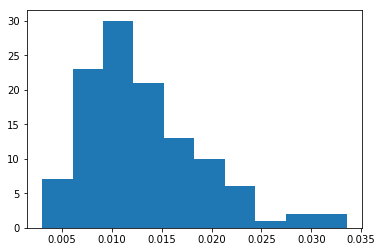

In [32]:
h = plt.hist(b.values())
plt.show(h)